In [41]:
import numpy as np
import scipy as sp
from scipy.integrate import quad 
import matplotlib.pyplot as plt
import sympy as smp
import plotly.graph_objects as go
from IPython.display import HTML

The electric field of any distribution os given by $$ \vec{E} = \frac{1}{4\pi\epsilon_0} \int_V \frac{\vec{r}-\vec{r'}}{|\vec{r}-\vec{r'}|^3} dq $$

* One Dimension:

$$ dq = \lambda(\vec{r}')|{d\vec{r}'}| = \lambda(\vec{r}')\left| \frac{d\vec{r}'}{dt}\right|$$

* Two Dimensions:

$$ dq = \sigma(\vec{r}')|d\vec{r}'| = \sigma(\vec{r}')\left| \frac{d\vec{r}'}{du} \times \frac{d\vec{r}'}{dv}\right| du dv$$

* Three Dimensions:

$$ dq = \rho(\vec{r}') dx dy dz = \rho(\vec{r}')r^2 sin(\theta)drd\phi d\theta = \;...$$

The challenge is solving for dq: once this is done we can easily solve the integral

## Making the problem dimensionless

$$ \vec{E} = \frac{1}{4\pi\epsilon_0} \int_V \frac{\rho(\vec{r}')(\vec{r}-\vec{r}')}{|\vec{r}-\vec{r}'|^3} dv' $$

means that 

$$\frac{4\pi\epsilon_0R^2}{Q}\vec{E} = \int_V \frac{\rho_d(\vec{r_d}')(\vec{r_d}-\vec{r_d}')}{|\vec{r_d}-\vec{r_d}'|^3} dv'_d $$

where $r_d$. $r'_d$, and $\rho_d$ are all dimensionless. We can then set $R = Q = 1$ with no loss of generality, and rescale according to the problem to regain the electric field for various length and charge configurations


### Example 1

Spring of charge with radius $R=1$ is located at $\vec{r}'(t) = \left<\cos(4t), \sin(4t), t\right>$ for $0 \leq t \leq 2\pi$ with total charge $Q=1$ and charge evenly spread across. Plot electric field and charge

Step 1: Find $dq$

Since we are in 1 dimension
$$dq = \lambda(\vec{r}')\left|\frac{d\vec{r}'}{dt}\right|dt$$

but we still need $\lambda(\vec{r}')$. Using the fact that $Q = 1 = \int dq = \lambda \int |d\vec{r}'/dt| dt$ we get
$$\lambda = \left[ \int |d\vec{r}'/dt| dt \right]^{-1}$$


In [28]:
t = smp.symbols('t', positive=True)
x, y, z = smp.symbols('x y z')

Define the test point $\vec{r} = \left< x, y, z \right>$ and the location of the charge $\vec{r}'$ which depends on the charge distribution.

In [29]:
r = smp.Matrix([x, y, z])
r_p = smp.Matrix([smp.cos(4*t), smp.sin(4*t), t])
sep = r - r_p

To solve for $\lambda = \left[ \int_{0}^{2\pi}|dr'/dt|dt \right]^{-1}$, we solve for $\frac{dr'}{dt}$ and then integrate

In [30]:
dr_pdt = smp.diff(r_p, t).norm().simplify()
lam = smp.integrate(dr_pdt, (t, 0, 2*smp.pi))

Now we define the integrand $\frac{\vec{r}-\vec{r}'}{|\vec{r}-\vec{r}'|^3}\lambda \left|\frac{d\vec{r}'}{dt} \right| $, which will eventually be integrated over all $t$

In [31]:
integrand = lam*sep/sep.norm()**3 * dr_pdt
integrand

Matrix([
[34*pi*(x - cos(4*t))/(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2)],
[34*pi*(y - sin(4*t))/(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2)],
[      34*pi*(-t + z)/(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2)]])

Convert the sympy symbolic expression into python numerical functions

In [32]:
dExdt = smp.lambdify([t, x, y, z], integrand[0])
dEydt = smp.lambdify([t, x, y, z], integrand[1])
dEzdt = smp.lambdify([t, x, y, z], integrand[2])

Function that integrates to find to the electric field

In [33]:
def E(x, y, z):
    return np.array([quad(dExdt, 0, 2*np.pi, args=(x, y, z))[0],
                    quad(dEydt, 0, 2*np.pi, args=(x, y, z))[0],
                    quad(dEzdt, 0, 2*np.pi, args=(x, y, z))[0]])


Meshgrid of test points to try and find the electric field

In [34]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(0, 2*np.pi, 10)
xv, yv, zv = np.meshgrid(x, y, z)

Compute electric field at all points in the meshgrid.

In [35]:
E_field = np.vectorize(E, signature='(),(),()->(n)')(xv, yv, zv)
Ex = E_field[:,:,:,0]
Ey = E_field[:,:,:,1]
Ez = E_field[:,:,:,2]

Look at the variation in the electric field over this meshgrid.

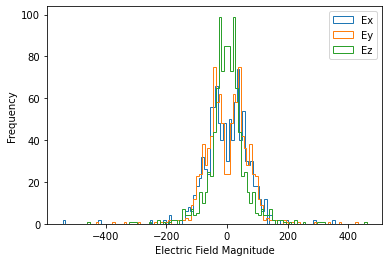

In [36]:
plt.hist(Ex.ravel(), bins=100, histtype='step',label='Ex')
plt.hist(Ey.ravel(), bins=100, histtype='step',label='Ey')
plt.hist(Ez.ravel(), bins=100, histtype='step',label='Ez')
plt.legend()
plt.xlabel('Electric Field Magnitude')
plt.ylabel('Frequency')
plt.show()

Since we will be making a cone plot to represent the electric field, we don't want really large field values to produce really large cones and make a messy plot. As such, we make it so that the maximum electric field is 150.

In [37]:
E_max = 150
Ex[Ex>E_max] = E_max
Ey[Ey>E_max] = E_max
Ez[Ez>E_max] = E_max

Ex[Ex<-E_max] = -E_max
Ey[Ey<-E_max] = -E_max
Ez[Ez<-E_max] = -E_max



Compute the line which will be used to plot the charge distribution in 3D.


In [38]:
tt = np.linspace(0, 2*np.pi, 1000)
lx, ly, lz = np.cos(4*tt), np.sin(4*tt), tt

Make the plot

In [54]:
data = go.Cone(x=xv.ravel(), y=yv.ravel(), z=zv.ravel(),
               u=Ex.ravel(), v=Ey.ravel(), w=Ez.ravel(),
               colorscale='Inferno', colorbar=dict(title='$x^2$'),
               sizemode="scaled", sizeref=0.5)

layout = go.Layout(title=r'Plot Title',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(data = data, layout=layout)
fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
                  line = dict(color='green', width=10))

fig.write_html('Efield.html')